<a href="https://colab.research.google.com/github/ParulSrivastava98/PlayStore-App-Data-Analysis/blob/main/Play_Store_App_Review_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##Importing Data of play store app review
import pandas as pd
df_psd=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Play Store Data.csv')
df_psd.shape

(10841, 13)

In [3]:
##Importing Data of user review
import pandas as pd
df_ur=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/User Reviews.csv')
df_ur.shape

(64295, 5)

In [4]:
##Importing Libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
##Displaying top 5 dataframe of play store data frame
df_psd.head()    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
##Displaying Top 5 dataframe of user review
df_ur.head()     

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
##Displaying all Columns in playstore dataframe
df_psd.columns       


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
##Displaying all Columns in user review dataframe
df_ur.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
## Description of play store app review data
df_psd.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
## Description of User review data
df_ur.describe()


,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
## Information of play store app review data
df_psd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
## Information of User review data
df_ur.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## **STEP 1: DATA CLEANING**



## **We have to find the missing values:-**

In [ ]:
df_psd.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

From the above we got that the maximum null values are in the Rating Column followed by the Current Ver after that Android Ver, Content Rating and Type.

In [4]:
##Checking for the duplicate/replicate values
df_psd[df_psd.duplicated(subset=['App'], keep='first')]  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [5]:
##Removing the duplicate values
df_psd.drop_duplicates(subset=['App'],keep='first', inplace=True, ignore_index=True) ##Using drop
df_psd[df_psd.duplicated(subset=['App'], keep='first')]



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [6]:
df_psd.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##**Replacing the null values with the mean value of the columns.**

In [7]:
##Overall Rating Mean
mean = df_psd["Rating"].mean()
print(mean)

4.17505184823716


*For the Rating Column:*

In [16]:
df_psd['Rating'].fillna(mean,inplace=True)

*For the Current Ver Column:*

In [15]:
df_psd['Current Ver'].fillna(mean,inplace=True)

*For the Android Ver Column:*

In [14]:
df_psd['Android Ver'].fillna(mean,inplace=True)

*For the Content Rating Column:*

In [13]:
df_psd['Content Rating'].fillna(mean,inplace=True)

*For the Type Column:*

In [12]:
df_psd['Type'].fillna(mean,inplace=True)


##**Checking Null values removed or not**




In [17]:
df_psd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##**STEP2: CHECKING OUTLIERS**

##Check for the Rating Column as the Rating needs to be between 1 and 5.

In [18]:
df_psd[df_psd.Rating<1]
##To check no Ratings is below 1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
df_psd[df_psd['Rating']>5]
##To check no Ratings is above 5


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,4.175052,"February 11, 2018",1.0.19,4.0 and up,4.175052


In [20]:
df_psd.drop([9300],inplace=True)
##Droping this cell as the rating is above 5


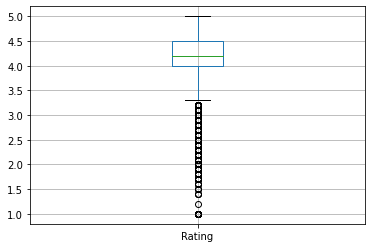

In [21]:
df_psd.boxplot()
##For checking the rating is between 1 and 5 only


Boxplot shows no rating is present which is below 1 and above 5.

##Further Data Cleaning:-

In [30]:
##Cleaning the Size Column 
df_psd['Size']=df_psd['Size'].apply(lambda x: str(x).replace('+','').replace('M','').replace(',','') if 'M' in str(x) else x)
df_psd['Size']=df_psd['Size'].apply(lambda x: str(x).replace('K','') if 'K' in str(x) else x)

In [35]:
df_psd.drop(df_psd[df_psd['Size'] == '1,000+'].index, inplace=True)
df_psd.drop(df_psd[df_psd['Size'] == 'Varies with device'].index, inplace=True) ##Drop varies device from size column
df_psd.Size=df_psd.Size.astype('float') ##change datatype according to data

df_psd['Price']=df_psd['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x) ##removing '$' from Price column
df_psd['Price']=df_psd['Price'].apply(lambda x: float(x)) ##change datatype according to data

df_psd['Installs']=df_psd['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x) ##removing ',' from Installs column
df_psd['Installs']=df_psd['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x) ##removing '+' from Installs column

df_psd = df_psd[~(df_psd['Android Ver'] == "and up")].reset_index(drop=True) ##Drop and up from Android Ver column
df_psd.drop(df_psd[df_psd['Current Ver'] == 'Varies with device'].index, inplace=True) ##Drop varies device from Current Ver column


##**Exploratory Data Analysis:-**

##SOME OBSERVATIONS ARE:-







**All Apps with 5 star Rating:**




In [36]:
df_psd[df_psd['Rating']==5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
235,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
395,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
398,Awake Dating,DATING,5.0,2,70.0,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
416,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
419,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8262,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
8281,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
8312,Monster Ride Pro,GAME,5.0,1,24.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
8356,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


**Average Apps Rating overall:**

In [37]:
df_psd['Rating'].mean()


4.1621504474293305

**Top five category getting Higest average Rating:**



In [39]:
df_psd.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

Category
EDUCATION          4.378126
EVENTS             4.369000
ART_AND_DESIGN     4.349593
PARENTING          4.315750
PERSONALIZATION    4.291175
Name: Rating, dtype: float64

**Apps with maximum Reviews:**


In [40]:
max_reviews=df_psd[df_psd['Reviews'].max()==df_psd['Reviews']]['App'].head().index
df_psd['App'][max_reviews]

1819    GollerCepte Live Score
Name: App, dtype: object

**Count of Free and Paid Apps:**


In [41]:
df_psd['Type'].value_counts()

Free    7695
Paid     679
Name: Type, dtype: int64

**Top 5 apps having maximum Installs:**

In [ ]:
max_installs=df_psd['Installs'].sort_values(ascending=False).head().index
df_psd.iloc[max_installs]['App']

342           UC Browser - Fast Download Private & Secure
1410                                       My Talking Tom
6486    Security Master - Antivirus, VPN, AppLock, Boo...
2527                           SHAREit - Transfer & Share
2508                                     Google Translate
Name: App, dtype: object

**Top 5 apps having maximum Reviews:**

In [42]:
max_Reviews=df_psd['Reviews'].sort_values(ascending=False).head().index
df_psd.iloc[max_Reviews]['App']

1819               GollerCepte Live Score
3152         Ad Block REMOVER - NEED ROOT
1675                  SnipSnap Coupon App
1928                           DreamTrips
1853    US Open Tennis Championships 2018
Name: App, dtype: object

##**DATA VISUALIZATION**

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Topmost categories on Playstore:**

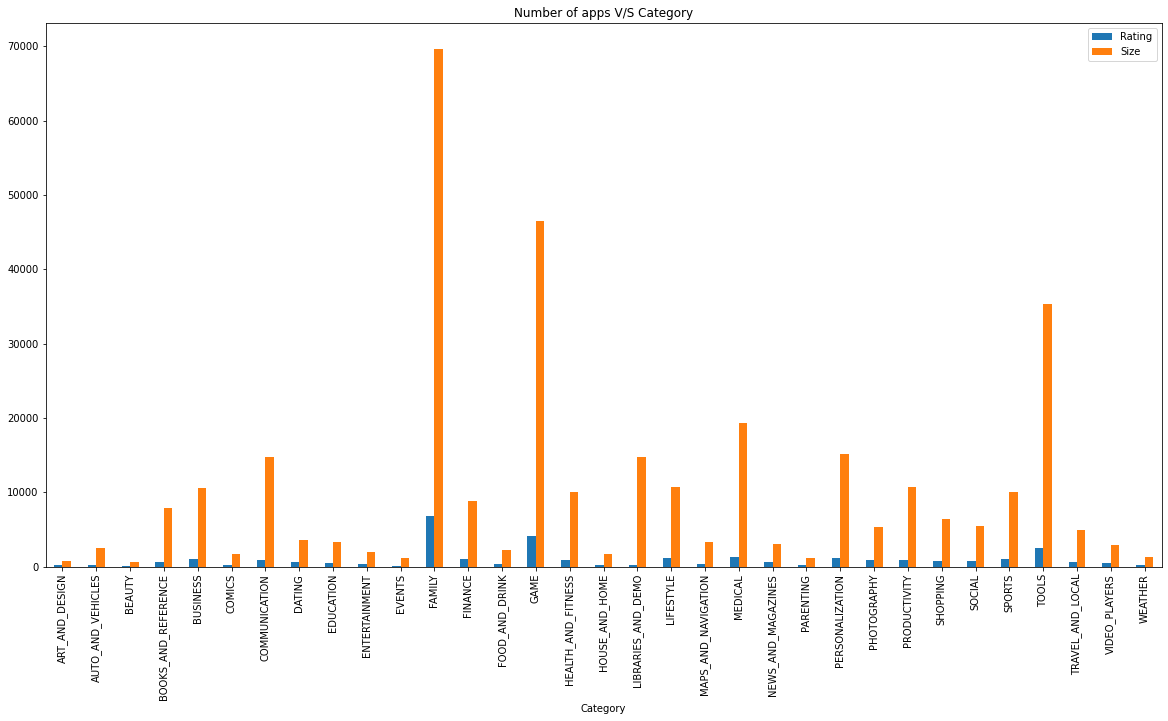

In [ ]:
##Using matplotlib library
df_psd.groupby('Category').sum().plot.bar(figsize=(20,10))
plt.title("Number of apps V/S Category");



*   The observations made from this is that the category Family is the most populary used category by play store users.
*   After that, Game and Tools is the highest used category by play store users, followed by business medicals etc.



**2. We are taking three columns under consideration to draw inferences-**



The columns are namely Installs, Size and Rating 

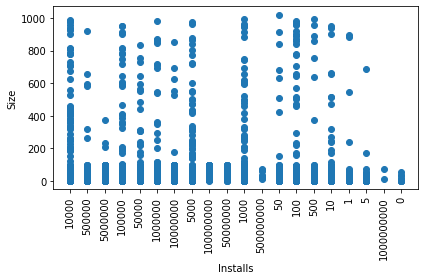

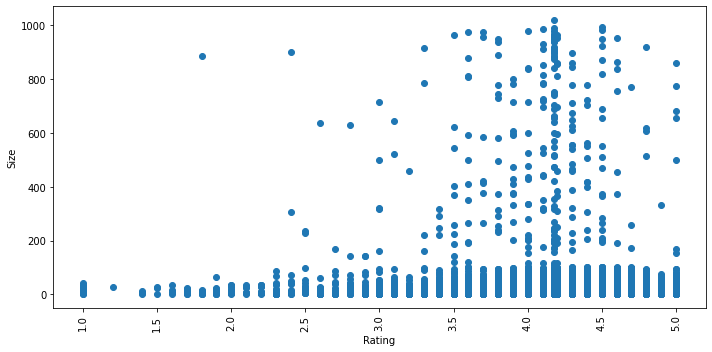

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plot the scatter plot of Installs and Size variable in data

plt.scatter(df_psd.Installs,df_psd.Size)
plt.rcParams['figure.figsize']=(10,5)
plt.xlabel('Installs')
plt.ylabel('Size')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


#plot the scatter plot of Rating and Size variable in data

plt.scatter(df_psd.Rating,df_psd.Size)
plt.rcParams['figure.figsize']=(10,5)
plt.xlabel('Rating')
plt.ylabel('Size')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


 

*   From the above first scatter plot the inference made is that lesser the size of an application is the more likely it is to be installed as compared to the applications with more size.
*   And from the second scatter plot inference is that higher rating is obtained by low smaller size applications compared to larger size applications.






**3. We plot the pair plot for finding relationship between  Installs, Size and Rating column:**

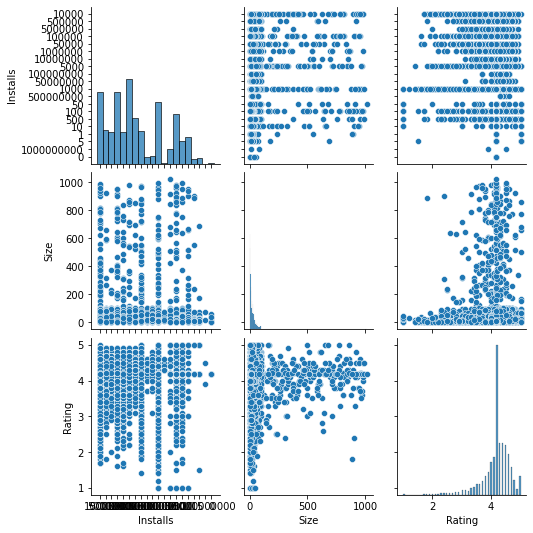

In [56]:
#plot the pair plot of Installs, Size and Rating in dataframe.
sns.pairplot(data =df_psd, vars=['Installs','Size','Rating'])
plt.xticks(rotation=180)
plt.show()




* From the above scatter plot the inference drawn is the relationships among the various variables namely Installs, Size and Ratings.

* Dots is used to represent them, they are basically used to monitor how changing one variable affects the others.

* As here we can see greater the size is more are the number of installs as well as reviews.


**4.CONTENT RATING CATEGORY:**

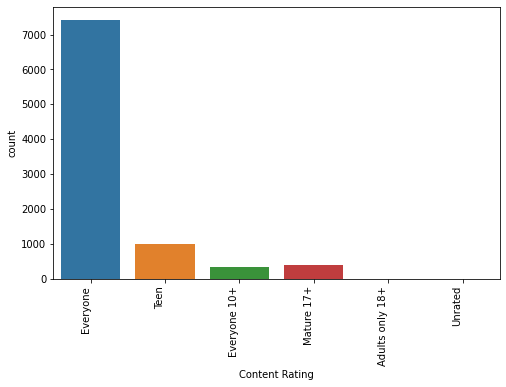

In [ ]:
plt.figure(figsize=(8,5))
plt.xticks(rotation = 90, ha = 'right')
ax =sns.countplot(x='Content Rating', data=df_psd)




*   From the above count plot of Category "everyone" is the widely used set of content rating used by the developers making it more age-friendly.
*   Most of the applications can be accessed by every age group.



##**JOINTPLOT: Showing relationship between Rating and Size -**

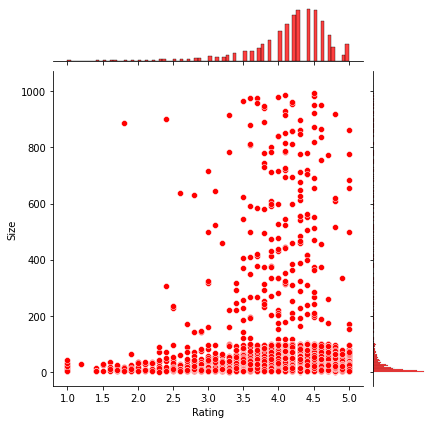

In [ ]:
import seaborn as sns
sns.jointplot(x = "Rating", y = "Size", kind = "scatter", color='r', data = df_psd)

# Showing the plot
plt.show()



*   From this jointplot the inference is that the applications having size around 30MB had the rating between 4.0 to 4.5MB. 

*  And so we can conclude that applications which are smaller in size, like less than 20MB,can have a 5.0 rating. Since, it is more preferred by users.






##**Sentiment Analysis:-**

In [7]:
##Find null values 
df_ur.isnull().sum()

App                            0
Translated_Review         142885
Sentiment                 142853
Sentiment_Polarity        142853
Sentiment_Subjectivity    142853
Type_x                         0
Price_x                        0
Type_y                         0
Price_y                        0
dtype: int64

In [8]:
##Drop null values
df_ur =df_ur.dropna()
df_ur.shape

(220223, 9)

In [9]:
##To check for null values removed or not
df_ur.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Type_x                    0
Price_x                   0
Type_y                    0
Price_y                   0
dtype: int64

In [22]:
df_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Type_x,Price_x,Type_y,Price_y,Type_x,Price_x,Type_y,Price_y
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,Free,0,Free,0,Free,0,Free,0
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,Free,0,Free,0,Free,0,Free,0
2,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,Free,0,Free,0,Free,0,Free,0
3,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,Free,0,Free,0,Free,0,Free,0
4,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,Free,0,Free,0,Free,0,Free,0


In [23]:
##Merge with the user review data set
df_ur=pd.merge(df_ur,df_psd[['App','Type','Price']],how='inner',on='App')
apps_free = df_ur[df_ur["Type"] == "Free"]
apps_paid = df_ur[df_ur["Type"] == "Paid"]
print("Apps Free - Percentage of Sentiment " + "-"*30 +"\n{}\n\n" .format(apps_free['Sentiment'].value_counts(normalize=True) * 100))
print("Apps Paid - Percentage of Sentimen " + "-"*30 + "\n{}".format(apps_paid['Sentiment'].value_counts(normalize=True) * 100))

Apps Free - Percentage of Sentiment ------------------------------
Positive    61.384166
Negative    31.549595
Neutral      7.066239
Name: Sentiment, dtype: float64


Apps Paid - Percentage of Sentimen ------------------------------
Positive    79.831729
Negative    15.387105
Neutral      4.781167
Name: Sentiment, dtype: float64


In [12]:
df_category = pd.merge(df_ur, df_psd[["App","Category"]] , how='inner', on="App")


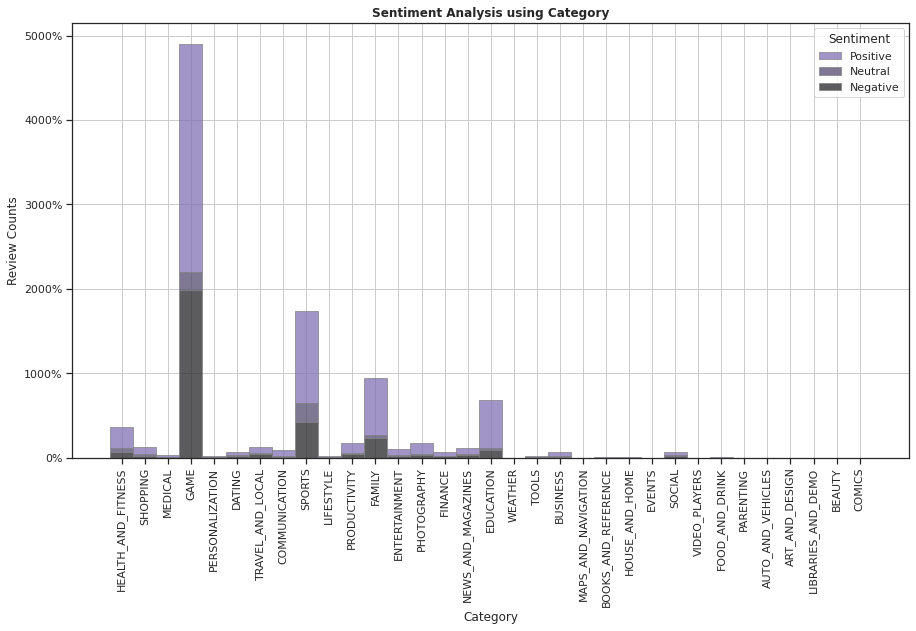

In [26]:
from matplotlib.ticker import PercentFormatter

f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)

sns.histplot(
    df_category,
    x="Category", hue="Sentiment",
    bins=38,
    ax=ax, 
    stat="count",
    multiple="stack",
    palette="dark:m_r",
    edgecolor=".5",
    linewidth=.7,
    legend=True
    )


ax.set_title("Sentiment Analysis using Category",fontsize=12,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=12)
ax.set_ylabel("Review Counts",fontsize=12)

plt.gca().yaxis.set_major_formatter(PercentFormatter(50000))
sns.set(style="ticks")
plt.grid()
plt.show()



*   The maximum review count is of games be it positive or negative.
*   Sports and after that education 



**Graph for user review sentiments:-**

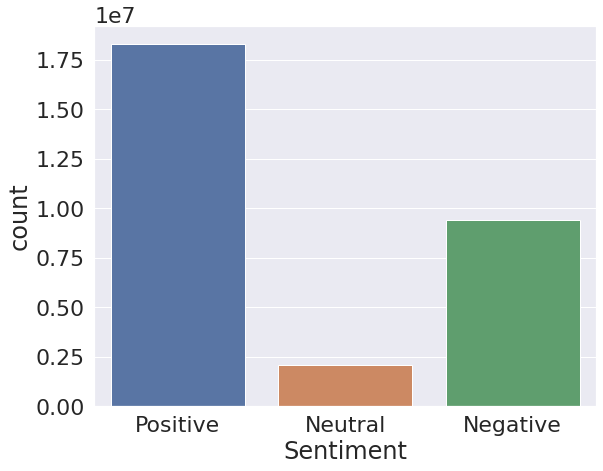

In [27]:
plt.figure(figsize=(9,7))
sns.set(font_scale=2)
plt.xlabel('Sentiment')
plt.ylabel('Count')
sns.countplot(x="Sentiment", data = df_ur)
plt.show()



*  The graph shows maximum sentiment are positive, positive sentiment shows user satisfaction with the application.

*  Then comes the second highest as negative sentiment and neutral sentiment is the last one.



##**CONCLUSIONS :**



*   The conclusions drawn from play store app data is that it has various applications present for all the purposes.
 
*   What makes an application more successful is that it needs to be **age friendly** and have a size that is light for users to use it with ease.

*   Also, other factors which influenced users were **positive sentiments**, more number of installs and better reviews.

*  And **free applications** were more preferred and used by the users.


*   The number of **installs increases** for the applications with** more ratings.**

*   **Average rating** of the applications was around **4.16** 















##**REFERENCE:-**



1.   Almabetter live videos and recorded lectures.

2.   GeeksforGeeks

3.   Towards Data Science Website

